## Prototype Demo

In [1]:
import os
os.chdir("..")
os.chdir("src/preprocessing")

In [2]:
from create_embedding import preprocess_folder, train_embedding_model, apply_embedding_model, combine_embeddings, encode_logo, decode_z
from deepsvg.svglib.svg import SVG
from deepsvg import utils

In [3]:
os.chdir("../..")

### 1 Preprocessing

#### 1.1 Simplify SVGs
Creates simplified SVGs and its tensors on SVG and path level

In [4]:
preprocess_folder(data_folder="data/svgs")

100%|████████████████████████████████████████████████████████████████████████████████| 419/419 [01:03<00:00,  6.60it/s]


In [5]:
preprocess_folder(data_folder="data/decomposed_svgs")

100%|██████████████████████████████████████████████████████████████████████████████| 5561/5561 [02:26<00:00, 37.93it/s]


#### 1.2 Train Embedding Model

In [6]:
model = train_embedding_model(data_folder="data/svgs", num_epochs=1, batch_size=20, save=False)

Parameters
  batch_size = 20
  ckpt_every = 1000
  collate_fn = None
  data_dir = data/svgs_tensors/
  dataloader_module = deepsvg.svgtensor_dataset
  filter_category = None
  filter_labels = None
  filter_platform = None
  filter_uni = None
  grad_clip = 1.0
  learning_rate = 0.001
  loader_num_workers = 4
  log_every = 20
  max_num_groups = 8
  max_seq_len = 30
  max_total_len = 50
  meta_filepath = data/svgs_meta.csv
  model_args = ['commands', 'args', 'commands', 'args']
  model_cfg = <configs.deepsvg.hierarchical_ordered.ModelConfig object at 0x000001F904340388>
  nb_augmentations = 1
  num_epochs = 1
  num_gpus = 1
  num_steps = None
  optimizer_starts = [0]
  pretrained_path = ./models/hierarchical_ordered.pth.tar
  stats_to_print = {'train': ['lr', 'time']}
  train_ratio = 1.0
  val_every = 10
  warmup_steps = 500
Loading dataset
Loading pretrained model ./models/hierarchical_ordered.pth.tar
#Parameters: 10,304,596
Epoch 1


#### 1.3 Apply Hierarchical Generative Network
Apply hierarchical generative network to produce latent vector z

In [4]:
model = "models/20210301_1813_model_batch60_epoch30_decomposed_svgs.pth.tar"

In [5]:
svgs_embedding = apply_embedding_model(model_path=model, data_folder="data/svgs", save=True)

100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [00:05<00:00, 32.01it/s]


In [6]:
decomposed_svgs_embedding = apply_embedding_model(model_path=model, data_folder="data/decomposed_svgs", save=True)

100%|██████████████████████████████████████████████████████████████████████████████| 3092/3092 [02:12<00:00, 23.36it/s]


In [8]:
combined_embedding = combine_embeddings(df_svg_embedding=svgs_embedding, df_decomposed_svg_embedding=decomposed_svgs_embedding, model_path=model, save=True)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_embedding[col] = merged_embeddings[str(col) + "_x"] + merged_embeddings[str(col) + "_y"]



In [9]:
combined_embedding

,filename,animation_id,0,1,2,3,4,5,6,7,...,246,247,248,249,250,251,252,253,254,255
0,Ableton,0,3.517644,-2.221145,2.426589,-0.335582,0.408024,0.467482,0.596992,0.929539,...,-2.618715,-1.132390,-0.681460,-0.026908,1.300111,2.522139,0.318490,-2.306422,2.755535,0.575454
1,A&O Hotels and Hostels,0,3.611988,-2.384859,2.050283,-0.208244,0.158463,0.833749,0.663469,0.539528,...,-1.935898,-1.652914,-1.100277,0.516891,1.920528,2.103320,-0.123224,-3.474483,2.698898,1.025379
2,A&O Hotels and Hostels,1,3.286057,-2.079230,2.122104,-0.263052,0.309977,0.845806,0.622541,0.677685,...,-1.833238,-1.330910,-1.147234,0.456843,1.758519,2.075548,-0.184199,-3.333424,2.771929,0.691892
3,Ableton,1,3.180732,-2.104532,2.313095,-0.427705,0.344866,0.330177,0.190357,0.675591,...,-2.678052,-1.195949,-0.732671,0.005957,1.622082,2.330484,0.286646,-2.836176,2.841082,0.335738
4,Ableton,2,3.436753,-2.154513,2.390192,-0.140887,0.303902,0.268003,0.399324,0.608917,...,-2.541381,-1.345490,-0.582850,-0.167250,1.611613,2.456892,-0.015959,-2.740299,2.744766,0.580454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,Öger Group,7,3.354184,-2.581339,2.127755,-0.112889,-0.028587,0.637631,0.197530,0.629679,...,-2.104873,-1.518951,-1.272587,0.146290,1.442890,2.158083,0.045911,-2.925663,2.616506,0.612828
2970,Öger Group,9,3.635494,-2.444565,2.422632,-0.083112,0.000461,0.757297,0.247601,0.587927,...,-1.965577,-1.417324,-0.959245,0.488662,1.492060,2.141334,0.428038,-2.733085,2.914678,0.380336
2971,Öger Group,8,4.040693,-2.761114,1.882030,-0.342164,0.140492,0.530168,0.030529,0.715658,...,-2.049555,-1.428372,-1.490032,0.676304,1.297831,1.748343,0.291577,-2.504542,2.731264,0.852913
2972,ÖRAG,1,3.081293,-2.530689,1.961947,-0.046195,0.150372,0.695613,0.368793,0.271956,...,-1.744570,-1.753945,-1.067059,0.510447,1.468020,2.085278,0.002981,-3.034999,2.755673,0.798450


##### Test Hierarchical Generative Network

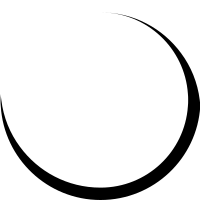

In [10]:
SVG.load_svg("data/decomposed_svgs/Bayer_2.svg").draw()

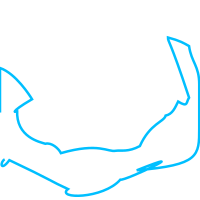

In [19]:
model = "models/hierarchical_ordered.pth.tar"
utils.set_seed(42) # Reproducibility
z = encode_logo("Bayer_2", model_path=model, data_folder="data/decomposed_svgs")
decode_z(z, model_path=model, data_folder="data/decomposed_svgs", do_display=True, return_svg=False, return_png=False)

### 2 Model